# **SPAM SMS DETECTION**

Build an AI model that can classify SMS messages as spam or
legitimate. Use techniques like TF-IDF or word embeddings with
classifiers like Naive Bayes, Logistic Regression, or Support Vector
Machines to identify spam messages

In [7]:
import numpy as np
import pandas as pd


**Read the Spam Csv File**

In [6]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Information About Spam.csv**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


**Drop the Unwanted Columns**

In [12]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

**Renaming the Columns**

In [14]:
df.rename(columns={'v1': 'Classifiy', 'v2': 'SMS_text'}, inplace=True)
df.head()

,Classifiy,SMS_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Distribution Of SMS as spam and ham**

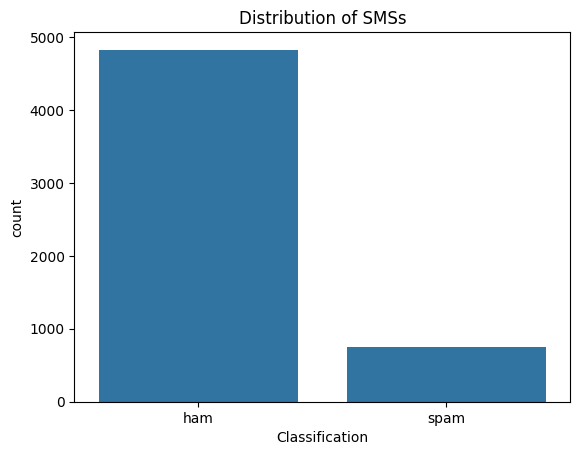

In [15]:
sns.countplot(data=df, x='Classifiy')
plt.xlabel('Classification')
plt.ylabel('count')
plt.title('Distribution of SMSs')
plt.show()

In [17]:
df['Classifiy'] = encoder.fit_transform(df['Classifiy'])
df.head()

,Classifiy,SMS_text,Classiy
0,0,"Go until jurong point, crazy.. Available only ...",0
1,0,Ok lar... Joking wif u oni...,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,0,U dun say so early hor... U c already then say...,0
4,0,"Nah I don't think he goes to usf, he lives aro...",0


**Sum of Duplicated Values**

In [18]:
df.duplicated().sum()

403

In [19]:
df = df.drop_duplicates(keep='first')

**Select rows where 'Classification' is equal to 1**

In [20]:
import nltk
df['num_char'] = df['SMS_text'].apply(len)

In [21]:
subset = df[df['Classifiy'] == 1]
description = subset['Classifiy'].describe()

print(description)

count    653.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Classifiy, dtype: float64


**Select rows where 'Classification' is equal to 0**

In [22]:
subset = df[df['Classifiy'] == 0]
description = subset['Classifiy'].describe()

print(description)

count    4516.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Classifiy, dtype: float64


**Mean For Number of characters**

In [23]:
mean_num_char = df.groupby('Classifiy')['num_char'].mean()

print(mean_num_char)

Classifiy
0     70.459256
1    137.891271
Name: num_char, dtype: float64


In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Tokenization**

In [27]:
df['num_words'] = df['SMS_text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Classifiy,SMS_text,Classiy,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,0,Ok lar... Joking wif u oni...,0,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,0,U dun say so early hor... U c already then say...,0,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [28]:
mean_num_words = df.groupby('Classifiy')['num_words'].mean()
print(mean_num_words)

Classifiy
0    17.123782
1    27.667688
Name: num_words, dtype: float64


In [29]:
df['num_sentences'] = df['SMS_text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,Classifiy,SMS_text,Classiy,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,0,Ok lar... Joking wif u oni...,0,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,0,U dun say so early hor... U c already then say...,0,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [31]:
mean_num_sentences = df.groupby('Classifiy')['num_sentences'].mean()

print(mean_num_sentences)

Classifiy
0    1.820195
1    2.970904
Name: num_sentences, dtype: float64


**Visual Representation Of Spam Classification**

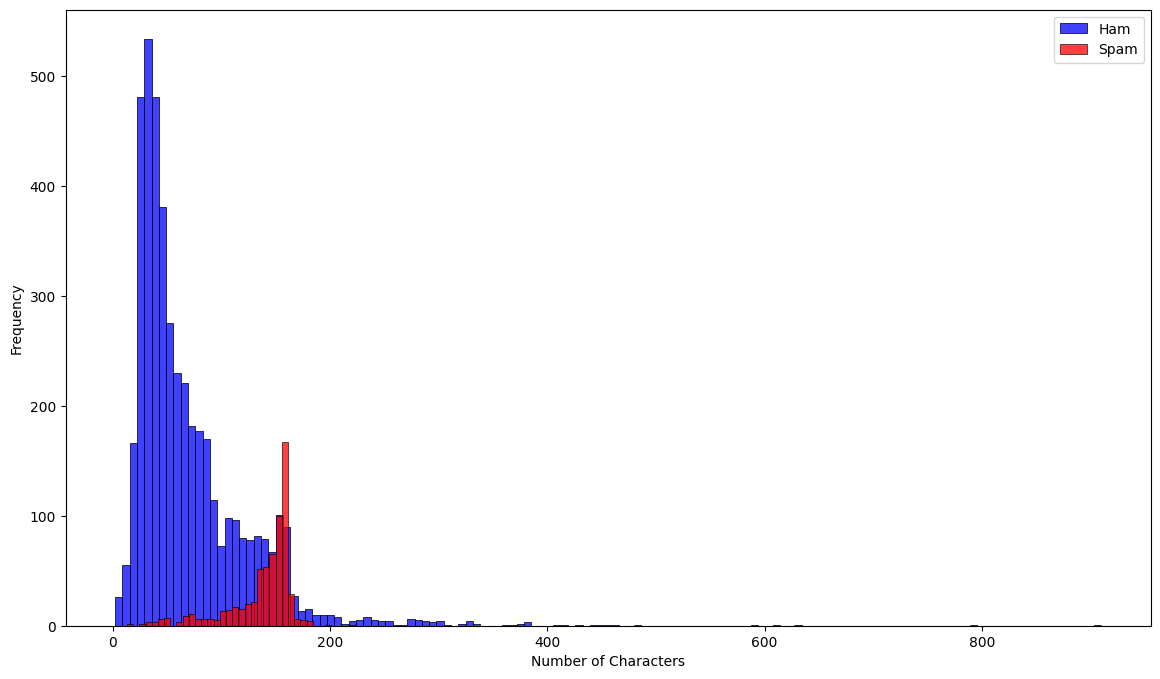

In [32]:
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.histplot(df[df['Classifiy']==0]['num_char'], color='blue', label='Ham')
sns.histplot(df[df['Classifiy']==1]['num_char'], color='red', label='Spam')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend()

plt.show()

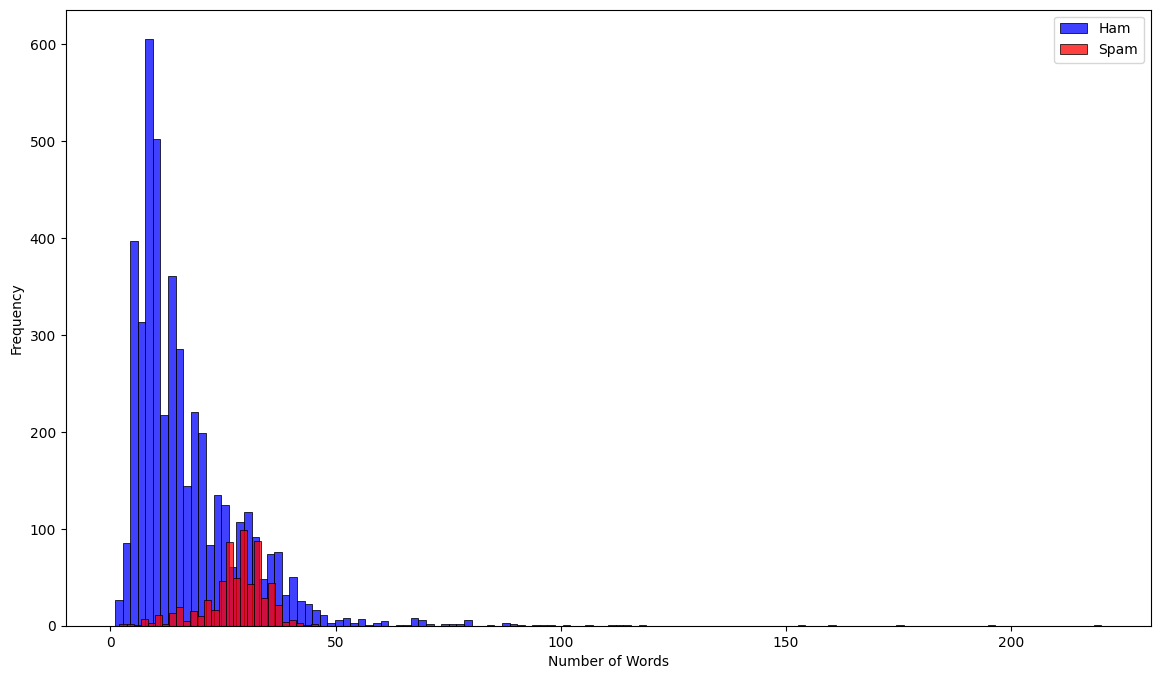

In [33]:
plt.figure(figsize=(14, 8))
sns.histplot(df[df['Classifiy']==0]['num_words'], color='blue', label='Ham')
sns.histplot(df[df['Classifiy']==1]['num_words'], color='red', label ='Spam')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()

plt.show()

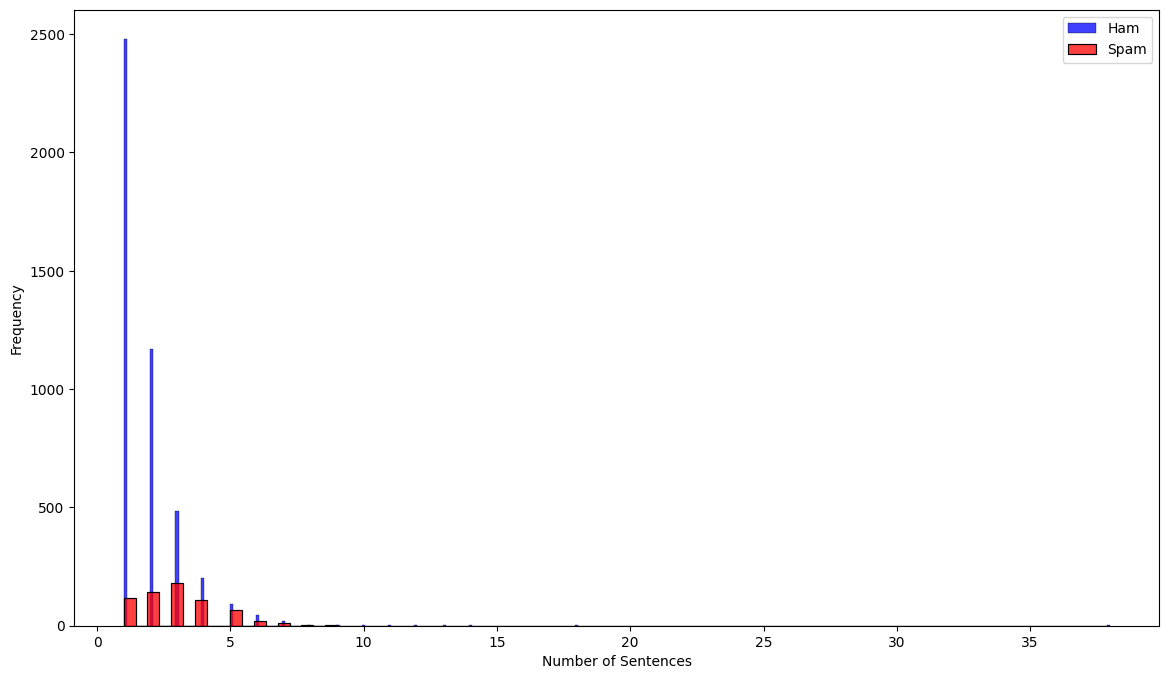

In [34]:
plt.figure(figsize=(14, 8))
sns.histplot(df[df['Classifiy']==0]['num_sentences'], color='blue', label='Ham')
sns.histplot(df[df['Classifiy']==1]['num_sentences'], color='red', label ='Spam')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.legend()

plt.show()

**HeatMap**

<Axes: >

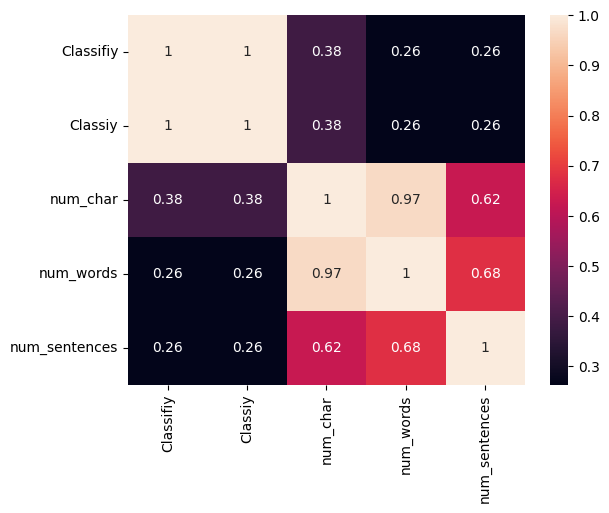

In [35]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
spam_texts = df[df['Classifiy'] == 1]['SMS_text']
tfidf_matrix = tfidf_vectorizer.fit_transform(spam_texts)
feature_names = tfidf_vectorizer.get_feature_names_out()
mean_tfidf_scores = tfidf_matrix.mean(axis=0).A1
word_tfidf_df = pd.DataFrame({'word': feature_names, 'mean_tfidf_score': mean_tfidf_scores})
high_spam_words = word_tfidf_df.sort_values(by='mean_tfidf_score', ascending=False)
print(high_spam_words.head(25))

            word  mean_tfidf_score
1315        free          0.035586
1739      mobile          0.024252
2480         txt          0.023741
2523          ur          0.023206
2389        text          0.023152
1009       claim          0.022208
2300        stop          0.022183
2092       reply          0.021906
1998       prize          0.021738
2657         www          0.017787
1810         new          0.017562
2645         won          0.016809
961         cash          0.016809
2525      urgent          0.016528
1534        just          0.015950
1070     contact          0.015114
339         150p          0.015045
2182     service          0.014889
1821       nokia          0.014677
2496          uk          0.014328
2177        send          0.014077
2626         win          0.013131
1394  guaranteed          0.012646
1705     message          0.012461
2610        week          0.012347


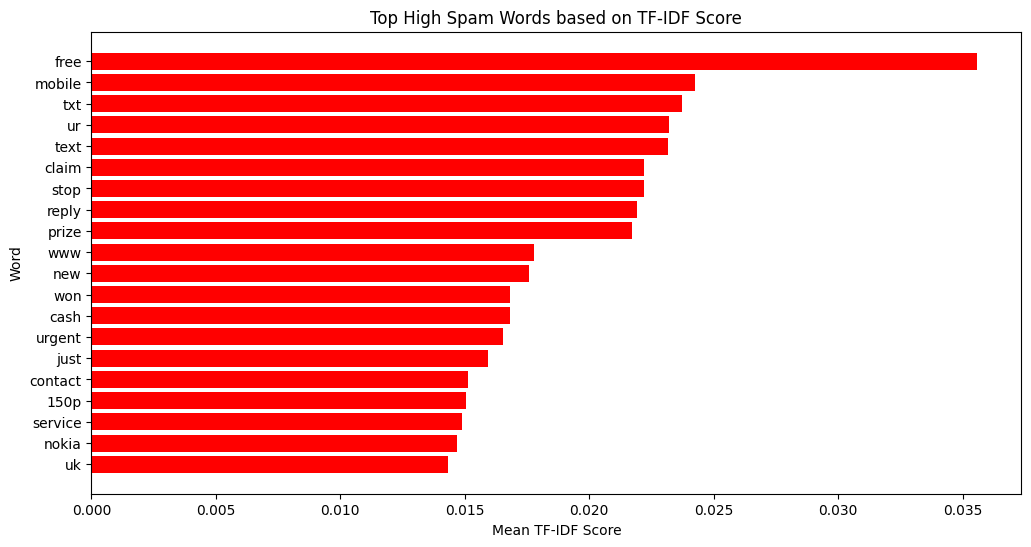

In [42]:
high_spam_words = word_tfidf_df.sort_values(by='mean_tfidf_score', ascending=False).head(20)
plt.figure(figsize=(12, 6))
plt.barh(high_spam_words['word'], high_spam_words['mean_tfidf_score'], color='red')
plt.xlabel('Mean TF-IDF Score')
plt.ylabel('Word')
plt.title('Top High Spam Words based on TF-IDF Score')
plt.gca().invert_yaxis()
plt.show()

**Splitting of Train and Test Dataset** **& Accuracy Of Spam Detection**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df['SMS_text']
y = df['Classifiy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9642166344294004

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.98      0.76      0.86       145

    accuracy                           0.96      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.96      0.96      0.96      1034


Confusion Matrix:
[[887   2]
 [ 35 110]]


***Finally We get 96% of Accuracy for detecting the Spam Message***